# import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# information with dataset 

# read csv file

In [2]:
#read_csv file.
df=pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
#check all information with column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Handling missing values

In [5]:
#check null value in this dataset
#fill the bmi coln. 
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
a=df["bmi"].mean()
df["bmi"].fillna(a,inplace=True)

In [7]:
#change age coln datatype float to int.
df["age"].replace(" ",np.nan,inplace=True)
df["age"]=df["age"].astype(int)
a=df["age"].mean()
df["age"].fillna(a,inplace=True)

In [8]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [9]:
#drop column to the id column.
df.drop("id",axis=1,inplace=True)

In [10]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [11]:
a=df["gender"].value_counts()
a

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [12]:
#gender 0----->female
#gender 1----->male
#gender 2----->other
#------------------x--------------------x----------------------x----------------------x-----------------x----------------------
#health stroke yes or no easily find.
#0 means no brain stroke.
#1 means brain stroke.
#------------------x--------------------x------------------x--------------------------x-----------------x------------------
#female:- no brain stroke is 2853 and stroke is 141.
#male:-no brain stroke is 2007 and stroke is 108.
gender_and_stroke=df.groupby(["gender","stroke"]).agg(total_stroke=("stroke","count")).reset_index()
gender_and_stroke

,gender,stroke,total_stroke
0,Female,0,2853
1,Female,1,141
2,Male,0,2007
3,Male,1,108
4,Other,0,1


[]

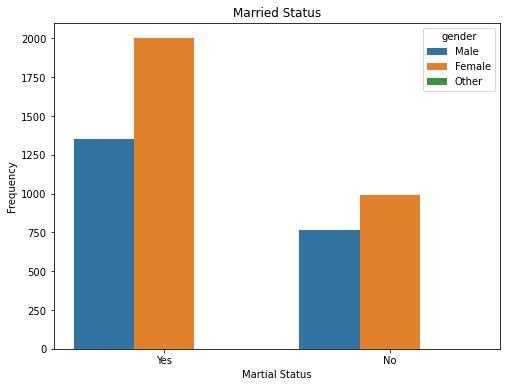

In [13]:
#count plot draw with ever_married
#0 means female
#1 means male 
plt.figure(figsize=(8,6))
sns.countplot(data=df,x="ever_married",hue="gender")
plt.title("Married Status")
plt.xlabel("Martial Status")
plt.ylabel("Frequency")
plt.plot()

In [14]:
#count plot used worktype easily show to whose gender work type means;0 means female,1 means male.
df["work_type"].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

[]

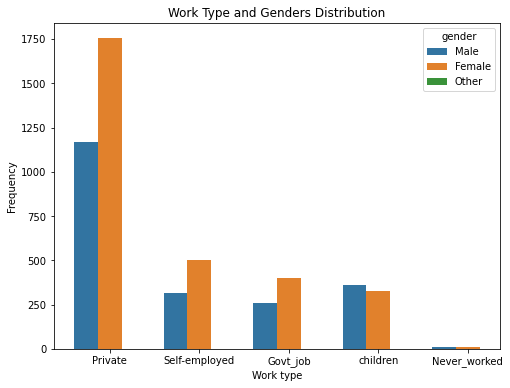

In [15]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x="work_type",hue="gender")
plt.title("Work Type and Genders Distribution")
plt.xlabel("Work type")
plt.ylabel("Frequency")
plt.plot()

<AxesSubplot:>

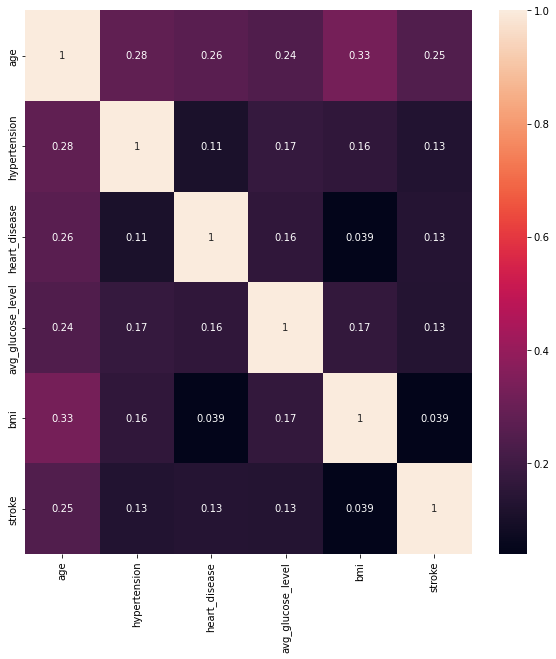

In [16]:
plt.figure(figsize = (10,10))
data = df.corr()
sns.heatmap(data, annot = True)

# Label Encoding

In [17]:
#separtly categorical data and numerical in a variable.
df_cat=df.select_dtypes(object)
df_num=df.select_dtypes(["int","float"])

In [18]:
from sklearn.preprocessing import LabelEncoder
for i in df_cat:
    le = LabelEncoder()
    df_cat[i]=le.fit_transform(df_cat[i])

In [19]:
df= pd.concat([df_cat,df_num],axis=1)

In [20]:
#separate x and y.
x=df.iloc[:,:-1]
y=df["stroke"]

In [21]:
#x(idndependent)always 2 dimensional
x.ndim

2

In [22]:
#y(dependent) always 1 Dimensional
y.ndim

1

# Oversampling 

In [23]:
#oversampling used because;imbalaced data handle to the balanced data but this technique used.   

In [24]:
#import SMOTE library.
from imblearn.over_sampling import SMOTE
x,y = SMOTE().fit_resample(x,y)
y.value_counts()

1    4861
0    4861
Name: stroke, dtype: int64

<AxesSubplot:xlabel='stroke', ylabel='count'>

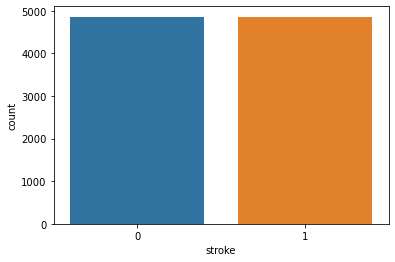

In [25]:

sns.countplot(y)

# spliting data for train and test

In [26]:
#train 80%
#test 30%
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=1)

# model building 

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *

In [28]:
lr = LogisticRegression()
svm = SVC()
knn = KNeighborsClassifier()
dt=DecisionTreeClassifier()

In [29]:
def runmodel(n):
    n.fit(xtrain,ytrain)
    ypred = n.predict(xtest)
    print(classification_report(ytest,ypred))

# logestic model

In [30]:
runmodel(lr)

              precision    recall  f1-score   support

           0       0.82      0.77      0.79      1453
           1       0.78      0.84      0.81      1464

    accuracy                           0.80      2917
   macro avg       0.80      0.80      0.80      2917
weighted avg       0.80      0.80      0.80      2917



# SVM

In [31]:
runmodel(svm)

              precision    recall  f1-score   support

           0       0.81      0.72      0.76      1453
           1       0.75      0.83      0.79      1464

    accuracy                           0.77      2917
   macro avg       0.78      0.77      0.77      2917
weighted avg       0.78      0.77      0.77      2917



# knn

In [32]:
runmodel(knn)

              precision    recall  f1-score   support

           0       0.97      0.79      0.87      1453
           1       0.82      0.98      0.89      1464

    accuracy                           0.88      2917
   macro avg       0.90      0.88      0.88      2917
weighted avg       0.90      0.88      0.88      2917



# Decision tree

In [33]:
runmodel(dt)

              precision    recall  f1-score   support

           0       0.92      0.87      0.89      1453
           1       0.88      0.92      0.90      1464

    accuracy                           0.90      2917
   macro avg       0.90      0.90      0.90      2917
weighted avg       0.90      0.90      0.90      2917

